### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 3


### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Бармина Ольга Константиновна
##### Группа:   НФИбд-01-19

## Москва 2022
***

### Вариант №11

1.	Считайте из заданного набора данных репозитария UCI значения двух признаков и метки класса. 

2.	Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если в признаках имеются пропущенные значения, то замените их на медианные значения того класса, к которому относится запись с пропущенным значением в признаке.

3.	Если количество различных меток класса больше пяти, то объедините некоторые (наименее многочисленные) классы, чтобы общее количество классов не превышало семь. 

4.	Визуализируйте набор данных в виде точек плоскости с координатами, соответствующими двум признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных. 

5.	Проведите кластеризацию набора данных из двух признаков с помощью алгоритмов, указанных в индивидуальном задании, для случая, когда количество кластеров равно количеству классов в исходном наборе (с учетом корректировки). В случае отсутствия сходимости алгоритма измените аргументы по умолчанию или используйте для кластеризации случайную выборку из набора данных.

6.	Для каждого из алгоритмов кластеризации, указанных в индивидуальном задании, постройте матрицу сопряженности, используя функцию `contingency_matrix()` из scikit-learn, и найдите значения мер качества кластеризации, указанные в индивидуальном задании.  

7.	Определите алгоритм кластеризации, оптимальный с точки зрения меры качества кластеризации, указанной в индивидуальном задании.

8.	Для оптимального алгоритма кластеризации из предыдущего пункта визуализируйте области принятия решения и набор данных в виде точек на плоскости с координатами, соответствующими двум признакам, отображая точки различных кластеров разными цветами. Подпишите оси и рисунок, создайте легенду набора данных. 

### Индивидуальный вариант:

Glass Identification Data Set 

Название файла: glass.data 

Ссылка: http://archive.ics.uci.edu/ml/datasets/Glass+Identification 

Первый признак: RI (столбец No 2) 

Второй признак: Al (столбец No 5) 

Класс: Type of glass (столбец No 11) 

Алгоритмы: K-means, BIRCH, OPTICS, Spectral Clustering 

Меры качества: F-мера, парные меры TP, FN, FP, TN, индекс Жаккара 

Найти лучший алгоритм кластеризации относительно меры качества: индекс Жаккара 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

1.	Считайте из заданного набора данных репозитария UCI значения двух признаков и метки класса. 

In [2]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"

df = pd.read_csv(url, sep=',', header=None)[[1,4,10]] # индексы на 1 ниже чем в задании т.к. нумерация с нуля
df

,1,4,10
0,1.52101,1.10,1
1,1.51761,1.36,1
2,1.51618,1.54,1
3,1.51766,1.29,1
4,1.51742,1.24,1
...,...,...,...
209,1.51623,2.88,7
210,1.51685,1.99,7
211,1.52065,2.02,7
212,1.51651,1.94,7


2.	Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если в признаках имеются пропущенные значения, то замените их на медианные значения того класса, к которому относится запись с пропущенным значением в признаке.

In [3]:
df.isnull().sum(axis=0)
# пустые значения отсутствуют

1     0
4     0
10    0
dtype: int64

3.	Если количество различных меток класса больше пяти, то объедините некоторые (наименее многочисленные) классы, чтобы общее количество классов не превышало семь. 

In [4]:
df.groupby(10).count()
# всего 6 классов, объеденим 5 и 6

,1,4
10,,
1,70,70
2,76,76
3,17,17
5,13,13
6,9,9
7,29,29


In [5]:
df[df[[10]] == 6] = 5

In [6]:
df.groupby(10).count()

,1,4
10,,
1,70,70
2,76,76
3,17,17
5,22,22
7,29,29


4.	Визуализируйте набор данных в виде точек плоскости с координатами, соответствующими двум признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных. 


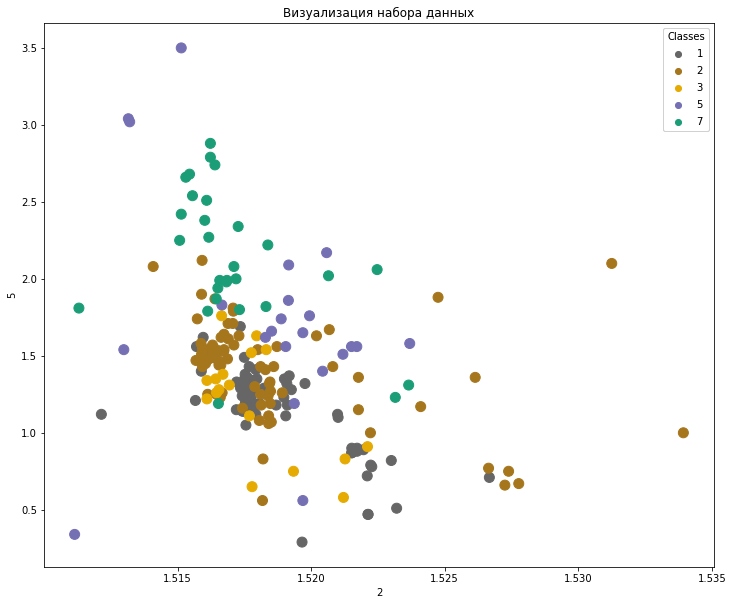

In [7]:
X = df[[1, 4]].to_numpy()
Y = df[10].to_numpy()
fig, ax = plt.subplots(figsize=(12,10))
scatter = ax.scatter(X[:,0], X[:,1], s=100, c=Y, cmap=plt.cm.Dark2_r);
ax.set_xlabel("2")
ax.set_ylabel("5")
ax.set_title("Визуализация набора данных")

legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)

5.	Проведите кластеризацию набора данных из двух признаков с помощью алгоритмов, указанных в индивидуальном задании, для случая, когда количество кластеров равно количеству классов в исходном наборе (с учетом корректировки). В случае отсутствия сходимости алгоритма измените аргументы по умолчанию или используйте для кластеризации случайную выборку из набора данных.

In [8]:
def plot_cluster(X,y):
    plt.figure(figsize=(12,10))
    clusters = np.unique(y)
    for cluster in clusters:
        row_ix = np.where(y == cluster)
        plt.scatter(X[row_ix, 0], X[row_ix, 1],s=100,label=cluster)        
    plt.xlabel("2")
    plt.ylabel("5")
    plt.title("Визуализация набора данных, разделенного на кластеры")
    plt.legend();
    plt.grid(True)

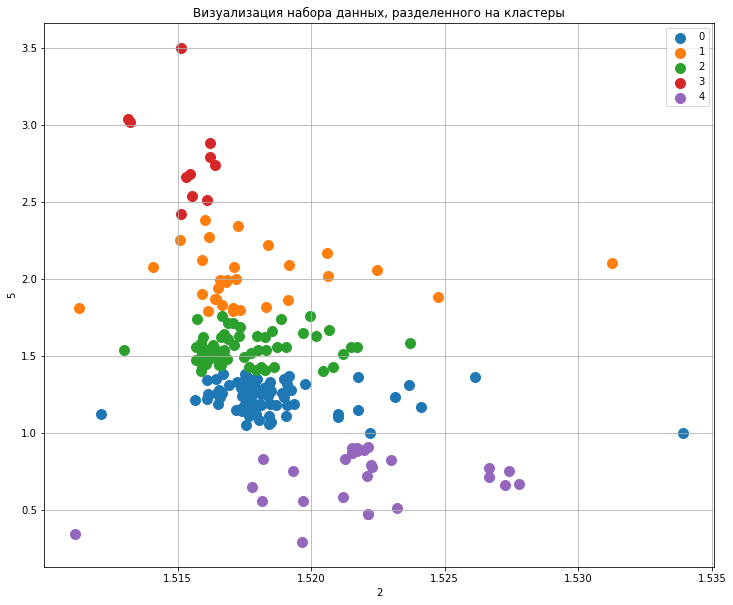

In [9]:
# кластеризация k-means 
from sklearn.cluster import KMeans

model_kmeans = KMeans(n_clusters=5)
model_kmeans.fit(X)
yhat = model_kmeans.predict(X)

plot_cluster(X,yhat)

labels_kmeans = model_kmeans.labels_

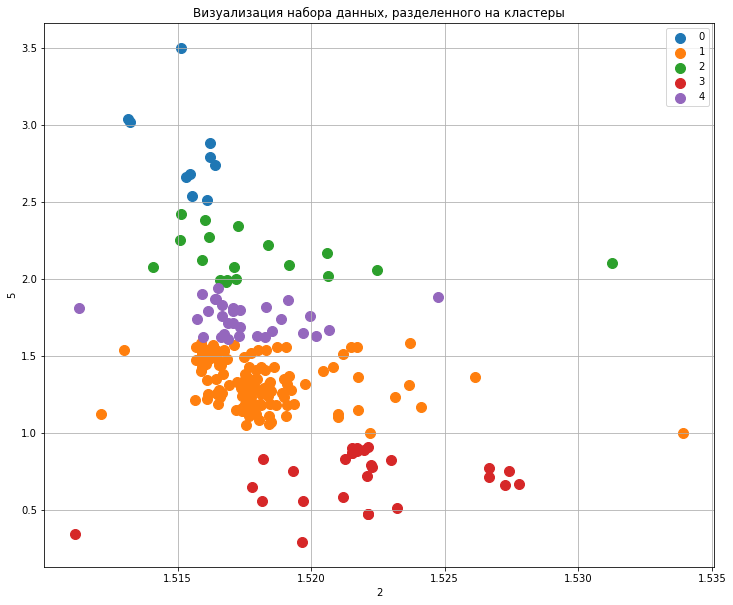

In [10]:
# кластеризация birch 
from sklearn.cluster import Birch

model_birch = Birch(threshold=0.01, n_clusters=5)
model_birch.fit(X)
yhat = model_birch.predict(X)

plot_cluster(X,yhat)

labels_birch = model_birch.labels_

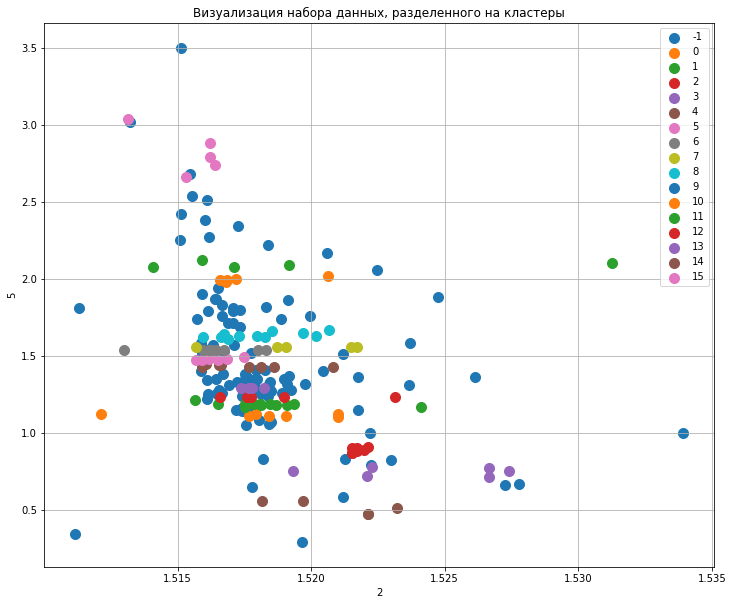

In [11]:
# кластеризация optics 
from sklearn.cluster import OPTICS

model_optics = OPTICS(eps=0.20, min_samples=5)
yhat = model_optics.fit_predict(X)

plot_cluster(X,yhat)

labels_optics = model_optics.labels_

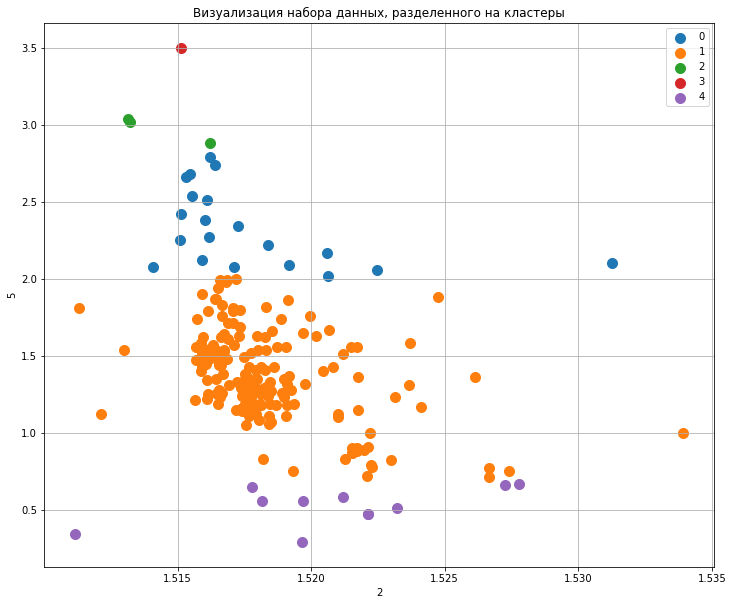

In [21]:
# спектральная кластеризация 
from sklearn.cluster import SpectralClustering

model_spec = SpectralClustering(n_clusters=5)
yhat_spec = model_spec.fit_predict(X)

plot_cluster(X,yhat_spec)

labels_spec = model_spec.labels_

6.	Для каждого из алгоритмов кластеризации, указанных в индивидуальном задании, постройте матрицу сопряженности, используя функцию `contingency_matrix()` из scikit-learn, и найдите значения мер качества кластеризации, указанные в индивидуальном задании.  

7.	Определите алгоритм кластеризации, оптимальный с точки зрения меры качества кластеризации, указанной в индивидуальном задании.

In [13]:
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import confusion_matrix

labels_true = Y

In [14]:
def counts_from_confusion(confusion):
    """
    Obtain TP, FN FP, and TN for each class in the confusion matrix
    """

    counts_list = []

    # Iterate through classes and store the counts
    for i in range(confusion.shape[0]):
        tp = confusion[i, i]

        fn_mask = np.zeros(confusion.shape)
        fn_mask[i, :] = 1
        fn_mask[i, i] = 0
        fn = np.sum(np.multiply(confusion, fn_mask))

        fp_mask = np.zeros(confusion.shape)
        fp_mask[:, i] = 1
        fp_mask[i, i] = 0
        fp = np.sum(np.multiply(confusion, fp_mask))

        tn_mask = 1 - (fn_mask + fp_mask)
        tn_mask[i, i] = 0
        tn = np.sum(np.multiply(confusion, tn_mask))

        counts_list.append({'Class': i,
                            'TP': tp,
                            'FN': fn,
                            'FP': fp,
                            'TN': tn})

    return counts_list

In [15]:
print('contingency_matrix\n', contingency_matrix(labels_true, labels_kmeans))
print('f1 - ',f1_score(labels_true, labels_kmeans, average='micro'))
print('jaccard - ',jaccard_score(labels_true, labels_kmeans, average='micro'))
counts_from_confusion(confusion_matrix(labels_true, labels_kmeans))

contingency_matrix
 [[47  0  8  0 15]
 [24  8 38  0  6]
 [ 8  0  4  0  5]
 [ 1  4 12  3  2]
 [ 3 18  0  8  0]]
f1 -  0.17757009345794392
jaccard -  0.09743589743589744


[{'Class': 0, 'TP': 0, 'FN': 0.0, 'FP': 83.0, 'TN': 131.0},
 {'Class': 1, 'TP': 0, 'FN': 70.0, 'FP': 30.0, 'TN': 114.0},
 {'Class': 2, 'TP': 38, 'FN': 38.0, 'FP': 24.0, 'TN': 114.0},
 {'Class': 3, 'TP': 0, 'FN': 17.0, 'FP': 11.0, 'TN': 186.0},
 {'Class': 4, 'TP': 0, 'FN': 0.0, 'FP': 28.0, 'TN': 186.0},
 {'Class': 5, 'TP': 0, 'FN': 22.0, 'FP': 0.0, 'TN': 192.0},
 {'Class': 6, 'TP': 0, 'FN': 29.0, 'FP': 0.0, 'TN': 185.0}]

In [16]:
print('contingency_matrix\n', contingency_matrix(labels_true, labels_birch))
print('f1 - ',f1_score(labels_true, labels_birch, average='micro'))
print('jaccard - ',jaccard_score(labels_true, labels_birch, average='micro'))
counts_from_confusion(confusion_matrix(labels_true, labels_birch))

contingency_matrix
 [[ 0 53  0 15  2]
 [ 0 53  3  6 14]
 [ 0 10  0  5  2]
 [ 3  8  2  2  7]
 [ 7  3 13  0  6]]
f1 -  0.2850467289719626
jaccard -  0.16621253405994552


[{'Class': 0, 'TP': 0, 'FN': 0.0, 'FP': 10.0, 'TN': 204.0},
 {'Class': 1, 'TP': 53, 'FN': 17.0, 'FP': 74.0, 'TN': 70.0},
 {'Class': 2, 'TP': 3, 'FN': 73.0, 'FP': 15.0, 'TN': 123.0},
 {'Class': 3, 'TP': 5, 'FN': 12.0, 'FP': 23.0, 'TN': 174.0},
 {'Class': 4, 'TP': 0, 'FN': 0.0, 'FP': 31.0, 'TN': 183.0},
 {'Class': 5, 'TP': 0, 'FN': 22.0, 'FP': 0.0, 'TN': 192.0},
 {'Class': 6, 'TP': 0, 'FN': 29.0, 'FP': 0.0, 'TN': 185.0}]

In [17]:
print('contingency_matrix\n', contingency_matrix(labels_true, labels_optics))
print('f1 - ',f1_score(labels_true, labels_optics, average='micro'))
print('jaccard - ',jaccard_score(labels_true, labels_optics, average='micro'))
counts_from_confusion(confusion_matrix(labels_true, labels_optics))

contingency_matrix
 [[31  5  9  3  5  1  1  1  1  1  0  0  0  6  3  3  0]
 [37  1  3  1  0  7  7  5  1  6  2  0  3  0  2  1  0]
 [12  1  0  0  0  0  0  1  0  1  0  0  0  1  1  0  0]
 [10  0  1  0  0  0  0  1  3  3  1  0  1  0  0  1  1]
 [13  0  1  1  0  0  0  0  0  0  4  5  1  0  0  0  4]]
f1 -  0.04672897196261682
jaccard -  0.023923444976076555


[{'Class': 0, 'TP': 0, 'FN': 0.0, 'FP': 103.0, 'TN': 111.0},
 {'Class': 1, 'TP': 0, 'FN': 0.0, 'FP': 7.0, 'TN': 207.0},
 {'Class': 2, 'TP': 9, 'FN': 61.0, 'FP': 5.0, 'TN': 139.0},
 {'Class': 3, 'TP': 1, 'FN': 75.0, 'FP': 4.0, 'TN': 134.0},
 {'Class': 4, 'TP': 0, 'FN': 17.0, 'FP': 5.0, 'TN': 192.0},
 {'Class': 5, 'TP': 0, 'FN': 0.0, 'FP': 8.0, 'TN': 206.0},
 {'Class': 6, 'TP': 0, 'FN': 22.0, 'FP': 8.0, 'TN': 184.0},
 {'Class': 7, 'TP': 0, 'FN': 0.0, 'FP': 8.0, 'TN': 206.0},
 {'Class': 8, 'TP': 0, 'FN': 29.0, 'FP': 5.0, 'TN': 180.0},
 {'Class': 9, 'TP': 0, 'FN': 0.0, 'FP': 11.0, 'TN': 203.0},
 {'Class': 10, 'TP': 0, 'FN': 0.0, 'FP': 7.0, 'TN': 207.0},
 {'Class': 11, 'TP': 0, 'FN': 0.0, 'FP': 5.0, 'TN': 209.0},
 {'Class': 12, 'TP': 0, 'FN': 0.0, 'FP': 5.0, 'TN': 209.0},
 {'Class': 13, 'TP': 0, 'FN': 0.0, 'FP': 7.0, 'TN': 207.0},
 {'Class': 14, 'TP': 0, 'FN': 0.0, 'FP': 6.0, 'TN': 208.0},
 {'Class': 15, 'TP': 0, 'FN': 0.0, 'FP': 5.0, 'TN': 209.0},
 {'Class': 16, 'TP': 0, 'FN': 0.0, 'FP': 5

In [18]:
print('contingency_matrix\n', contingency_matrix(labels_true, labels_spec))
print('f1 - ',f1_score(labels_true, labels_spec, average='micro'))
print('jaccard - ',jaccard_score(labels_true, labels_spec, average='micro'))
counts_from_confusion(confusion_matrix(labels_true, labels_spec))
# по мере Жаккара самый оптимальный алгоритм - спектральная кластеризация 

contingency_matrix
 [[66  0  0  0  4]
 [70  3  0  0  3]
 [15  0  0  0  2]
 [15  2  1  2  2]
 [ 9 18  0  2  0]]
f1 -  0.0
jaccard -  0.0


[{'Class': 0, 'TP': 0, 'FN': 0.0, 'FP': 175.0, 'TN': 39.0},
 {'Class': 1, 'TP': 0, 'FN': 70.0, 'FP': 23.0, 'TN': 121.0},
 {'Class': 2, 'TP': 0, 'FN': 76.0, 'FP': 1.0, 'TN': 137.0},
 {'Class': 3, 'TP': 0, 'FN': 17.0, 'FP': 4.0, 'TN': 193.0},
 {'Class': 4, 'TP': 0, 'FN': 0.0, 'FP': 11.0, 'TN': 203.0},
 {'Class': 5, 'TP': 0, 'FN': 22.0, 'FP': 0.0, 'TN': 192.0},
 {'Class': 6, 'TP': 0, 'FN': 29.0, 'FP': 0.0, 'TN': 185.0}]

8.	Для оптимального алгоритма кластеризации из предыдущего пункта визуализируйте области принятия решения и набор данных в виде точек на плоскости с координатами, соответствующими двум признакам, отображая точки различных кластеров разными цветами. Подпишите оси и рисунок, создайте легенду набора данных. 

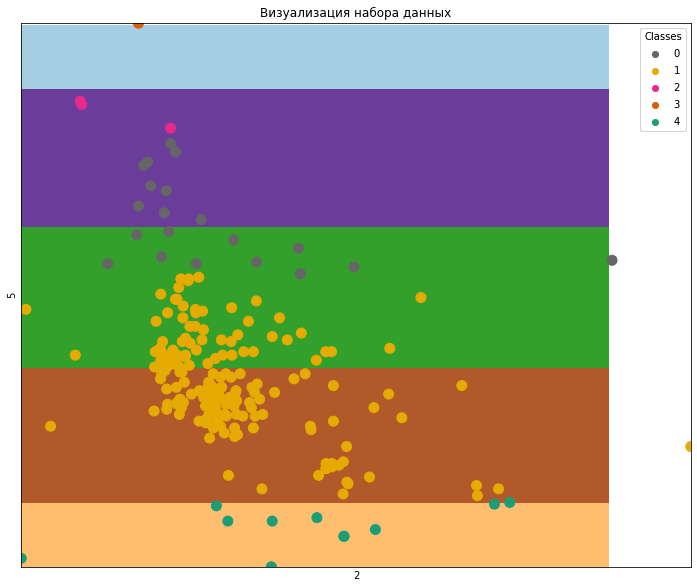

In [22]:
h = 0.02

x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = model_spec.fit_predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(12,10))
scatter = ax.scatter(X[:,0], X[:,1], s=100, c=yhat_spec, cmap=plt.cm.Dark2_r);

ax.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

ax.set_xlabel("2")
ax.set_ylabel("5")
ax.set_title("Визуализация набора данных")
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_xticks(())
ax.set_yticks(())

legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)